# Game Success Predictor: Analyzing Factors for Game Sales
   

This project involves working for the online store Ice, which sells video games worldwide. The goal is to analyze user and expert reviews, game genres, platforms (such as Xbox or PlayStation), and historical sales data to identify patterns that determine whether a game will be successful or not. This analysis will help in identifying promising projects and planning advertising campaigns.

### Getting the basic info about our dataset

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st 
import matplotlib.pyplot as plt

In [2]:
# Loading our dataset

df = pd.read_csv('/Users/project/games_project/games.csv')

In [3]:
print(f"Our DataFrame has {df.shape[0]} rows and {df.shape[1]} column")

Our DataFrame has 16715 rows and 11 column


In [4]:
# Quick look to our columns and their values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Calculating absent values percentag

df.isnull().sum()/len(df)

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### First Observations

Our DataFrame has 16715 rows and 11 columns.

The following columns have missing values:

Name
Year_of_release
Critic Score
User Score
Rating
The following columns have incorrect data types:

Year_of_release should be of type int or datetime
Critic Score should be of type int
User Score should be of type float
Rating should be of type object
The release year has a minimum value of 1980 and a maximum value of 2016. In this case, we need to determine if values prior to the year 2000 contribute to our analysis or if we can discard them.

For North American sales, we have minimum sales of 0 million and maximum sales of 41.36 million.

For European sales, we have minimum sales of 0 million and maximum sales of 28.96 million.

For Japanese sales, we have minimum sales of 0 million and maximum sales of 10.22 million.

For sales in other countries, we have minimum sales of 0 million and maximum sales of 10.57 million.

For Critic Score, we have minimum scores of 13 points and maximum scores of 98 points.


In [8]:
# Changing columns names to lowercase

df.columns = df.columns.str.lower()

In [9]:
# Checking user score in order to impute 'tbd' values

df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
# Changing user score datatype

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [11]:
# Replacing tbd values

df['user_score'] = df['user_score'].replace('tbd',np.nan)

In [12]:
# Checking ESBR clasification to try to impute absent values

df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

While researching the categories, I have decided to replace K-A and EC with E. This decision is based on the fact that K-A was replaced by E in the late 1990s, and EC was also absorbed into the E classification. Ultimately, these categories fall within the "For Everyone" range.

In [13]:
# Replacing outdated categories

df['rating'] = df['rating'].replace('K-A','E')
df['rating'] = df['rating'].replace('EC','E')

##### Handling missing values for the 'name' column

In [14]:
# Absent values q'ty

name_null = df['name'].isnull().sum()

print(f'Absent values on name: {name_null} values.')

Absent values on name: 2 values.


In [15]:
# Giving a quick look to absent values

df[df['name'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We can observe that we only have two missing values, which correspond to 0.012% of our DataFrame. Therefore, we will proceed to discard them.

In [16]:
df = df.dropna(subset=['name'], axis=0).reset_index(drop=True)

In [17]:
# Checking

name_null = df['name'].isnull().sum()

print(f'La cantidad de valores ausentes en la columna name son {name_null} valores.')

La cantidad de valores ausentes en la columna name son 0 valores.


##### Handling missing values for the 'year_of_release' column

In [18]:
# Visualizing year of release data

df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


* We can observe that some titles have a year in their name, and typically, these titles indicate that they were released one year earlier. Therefore, I will create a function that extracts these years and subtracts one from them. Then, I will use this function to impute the missing values in the 'year_of_release' column as much as possible.

In [19]:
#Extracting and Adjust Year from Title

import re


def extraer_numero(valor):
    if pd.isna(valor):
        return np.nan
    else:
        numero = re.findall(r'\d+\.?\d*', str(valor))
        if len(numero) > 0:
            num_float = float(numero[0])
            num_float -= 1  # Restar 1
            if len(str(int(num_float))) == 4:  # Comprobar si la longitud del número es 4
                return int(num_float)
            else:
                return np.nan
        else:
            return np.nan

df['imputed_year'] = df['name'].apply(extraer_numero)


In [20]:
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,imputed_year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN


In [21]:
# Imputing obtained values

def fill_missing_year(df):
    df['guessed_year'] = df['name'].str.extract(r'(\d{4})').astype(float) #extraemos los años de la columna "name" y los guardamos como números en una nueva columna "guessed_year"
    df['year_of_release'] = df['year_of_release'].fillna(df['guessed_year']) #rellenamos los valores NaN de la columna "year_of_release" con los valores de la columna "guessed_year"
    df = df.drop(columns=['guessed_year']) #eliminamos la columna "guessed_year"
    return df

df = fill_missing_year(df)

In [22]:
df = df.drop('imputed_year', axis=1)

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [24]:
# Droping absent data on year of release

df.dropna(subset=['year_of_release'],inplace=True)

##### Handling missing values for the 'critic_score' and 'rating' columns

* Imputing these missing values is not feasible because it's possible that certain games don't have available ratings. Additionally, the number of missing values is a significant percentage of the rows, making it impractical to drop them. Therefore, I have decided to leave them as they are.

In [25]:
# Fixing remaining datatype columns

df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

##### Calculating total sales

In [26]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)

### Analysing the data

In [27]:
# Relased games per year

games_year = df.pivot_table(index=['year_of_release'], values='name',aggfunc='count')

In [28]:
games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


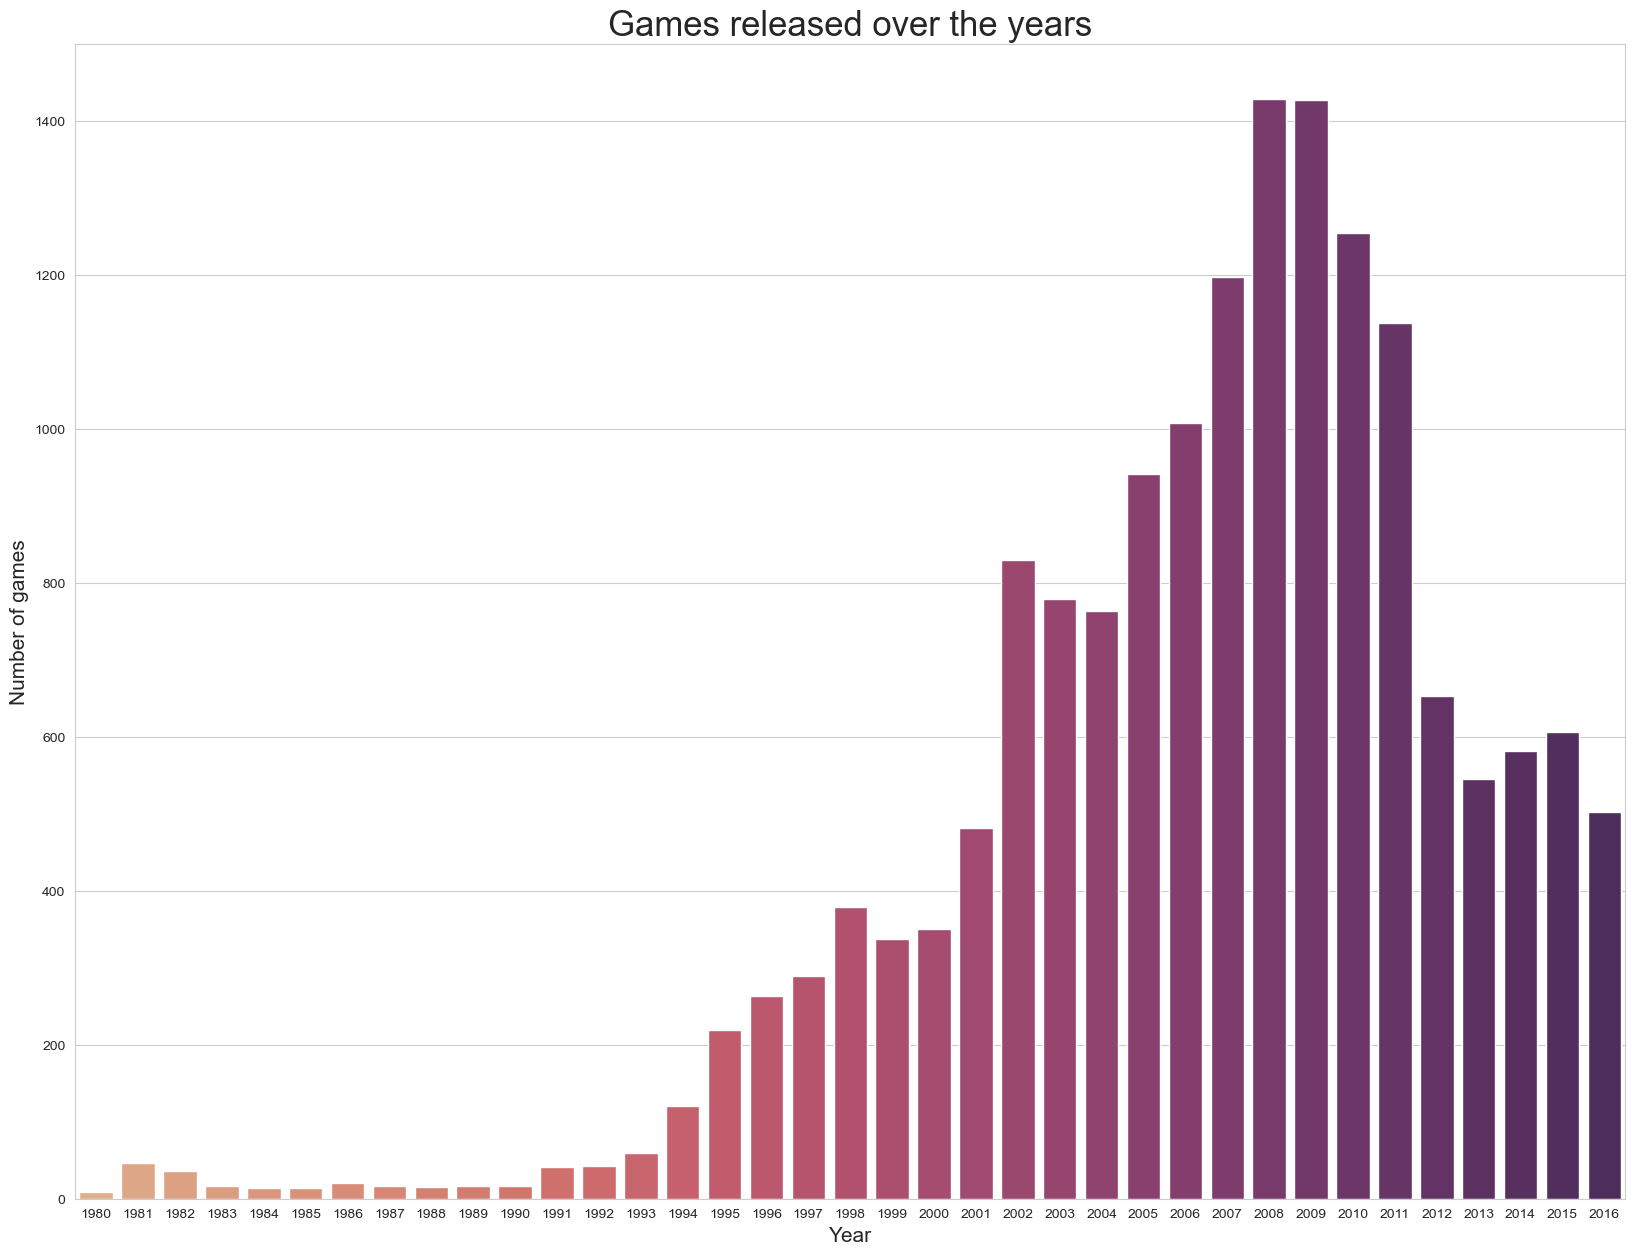

In [29]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
palette = sns.color_palette("flare", len(games_year))
ax = sns.barplot(x=games_year.index, y=games_year['name'], palette=palette)
plt.title('Games released over the years', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of games', fontsize=15)
plt.show()

##### Are the data from each period significant?

* We can observe that the release of video games started to take off during the second half of the 1990s, reaching a peak in 2009.
* Not all periods are significant due to the low rate of releases. Before 1995, the number of releases was small, so it wouldn't make sense to consider them. Additionally, those consoles were no longer active by 2006 (except for PC, which is not just a gaming console).


In [30]:

# Sales per platform

sales_platform = df.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values('total_sales', ascending=False)

In [31]:
display(sales_platform)

,total_sales
platform,
PS2,1247.28
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,290.34


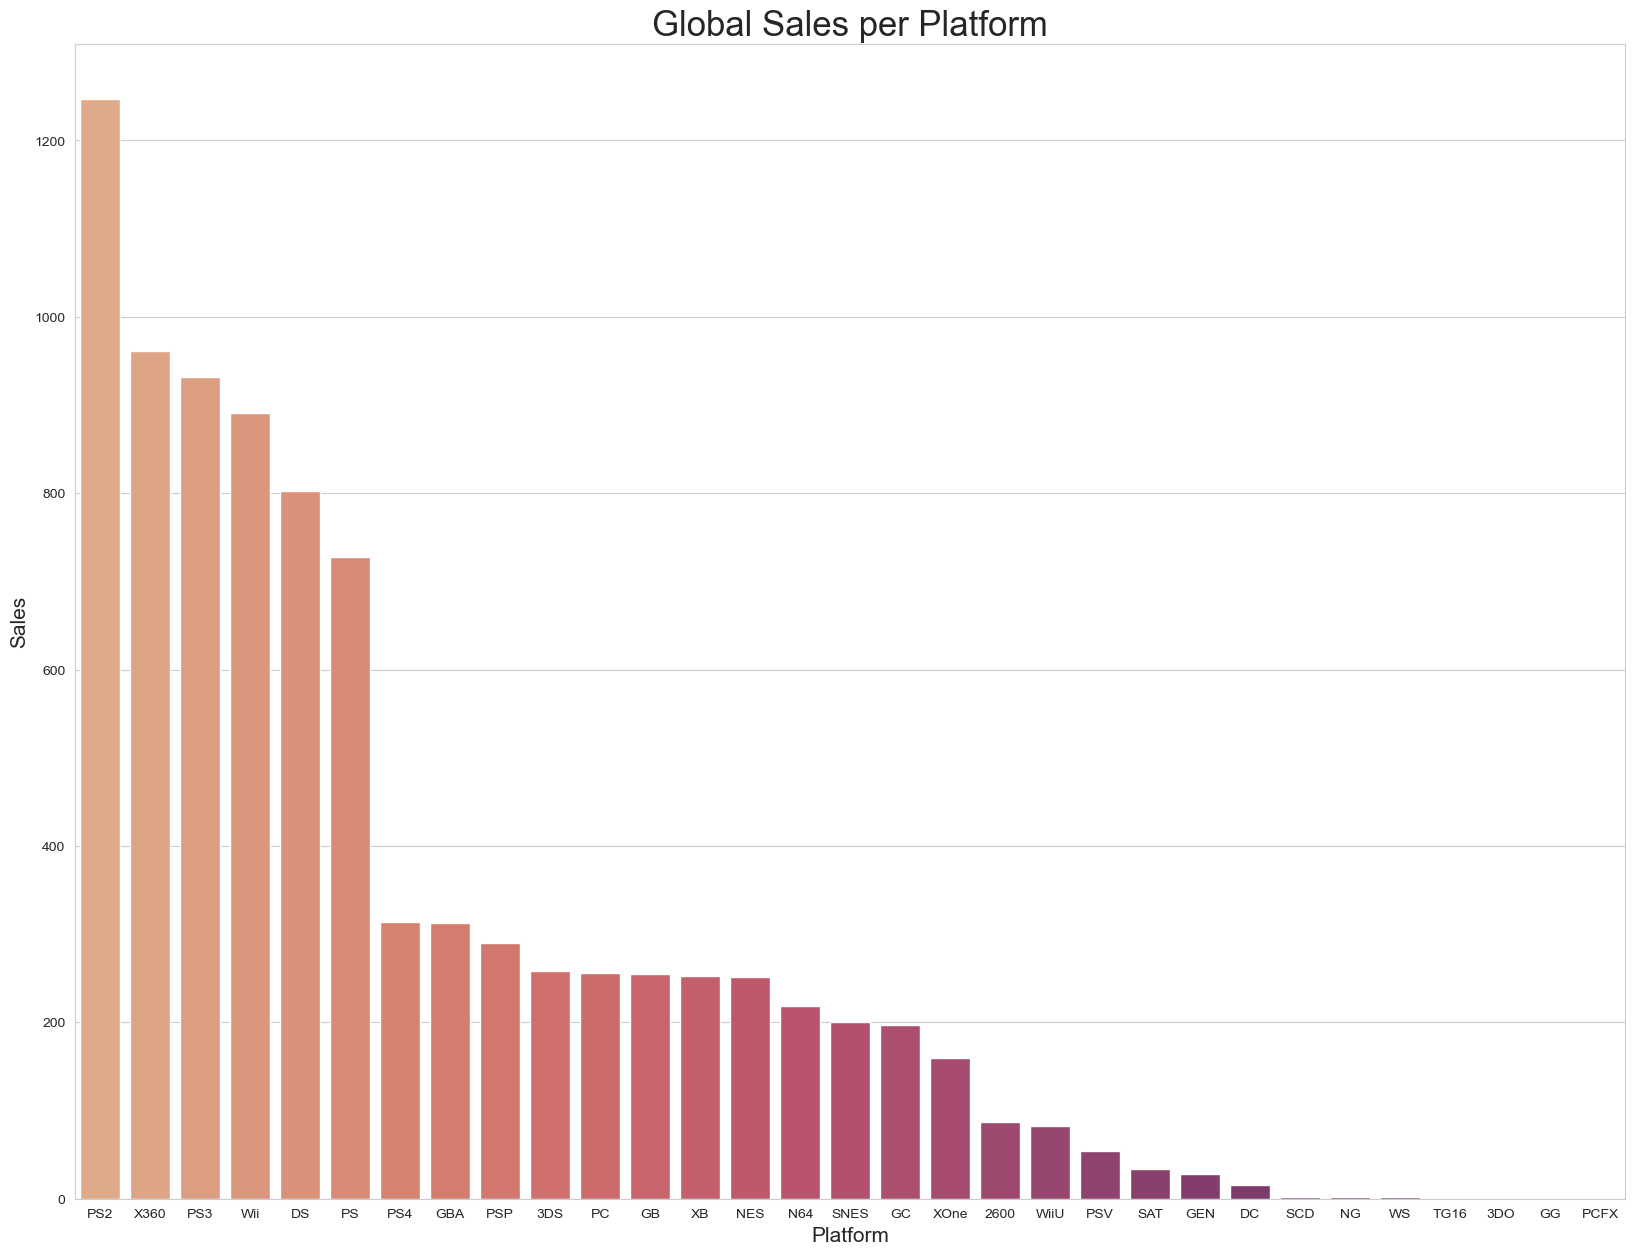

In [32]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
palette = sns.color_palette("flare", len(sales_platform))
ax = sns.barplot(x=sales_platform.index, y=sales_platform['total_sales'], order=sales_platform.sort_values('total_sales', ascending=False).index, palette=palette)
plt.title('Global Sales per Platform', fontsize=25)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()


##### Top Sales platform:

1. PS2
2. DS
3. PS3
4. Wii
5. X360

Text(0.5, 1.0, 'Number of Games and Sales by Platform and Year')

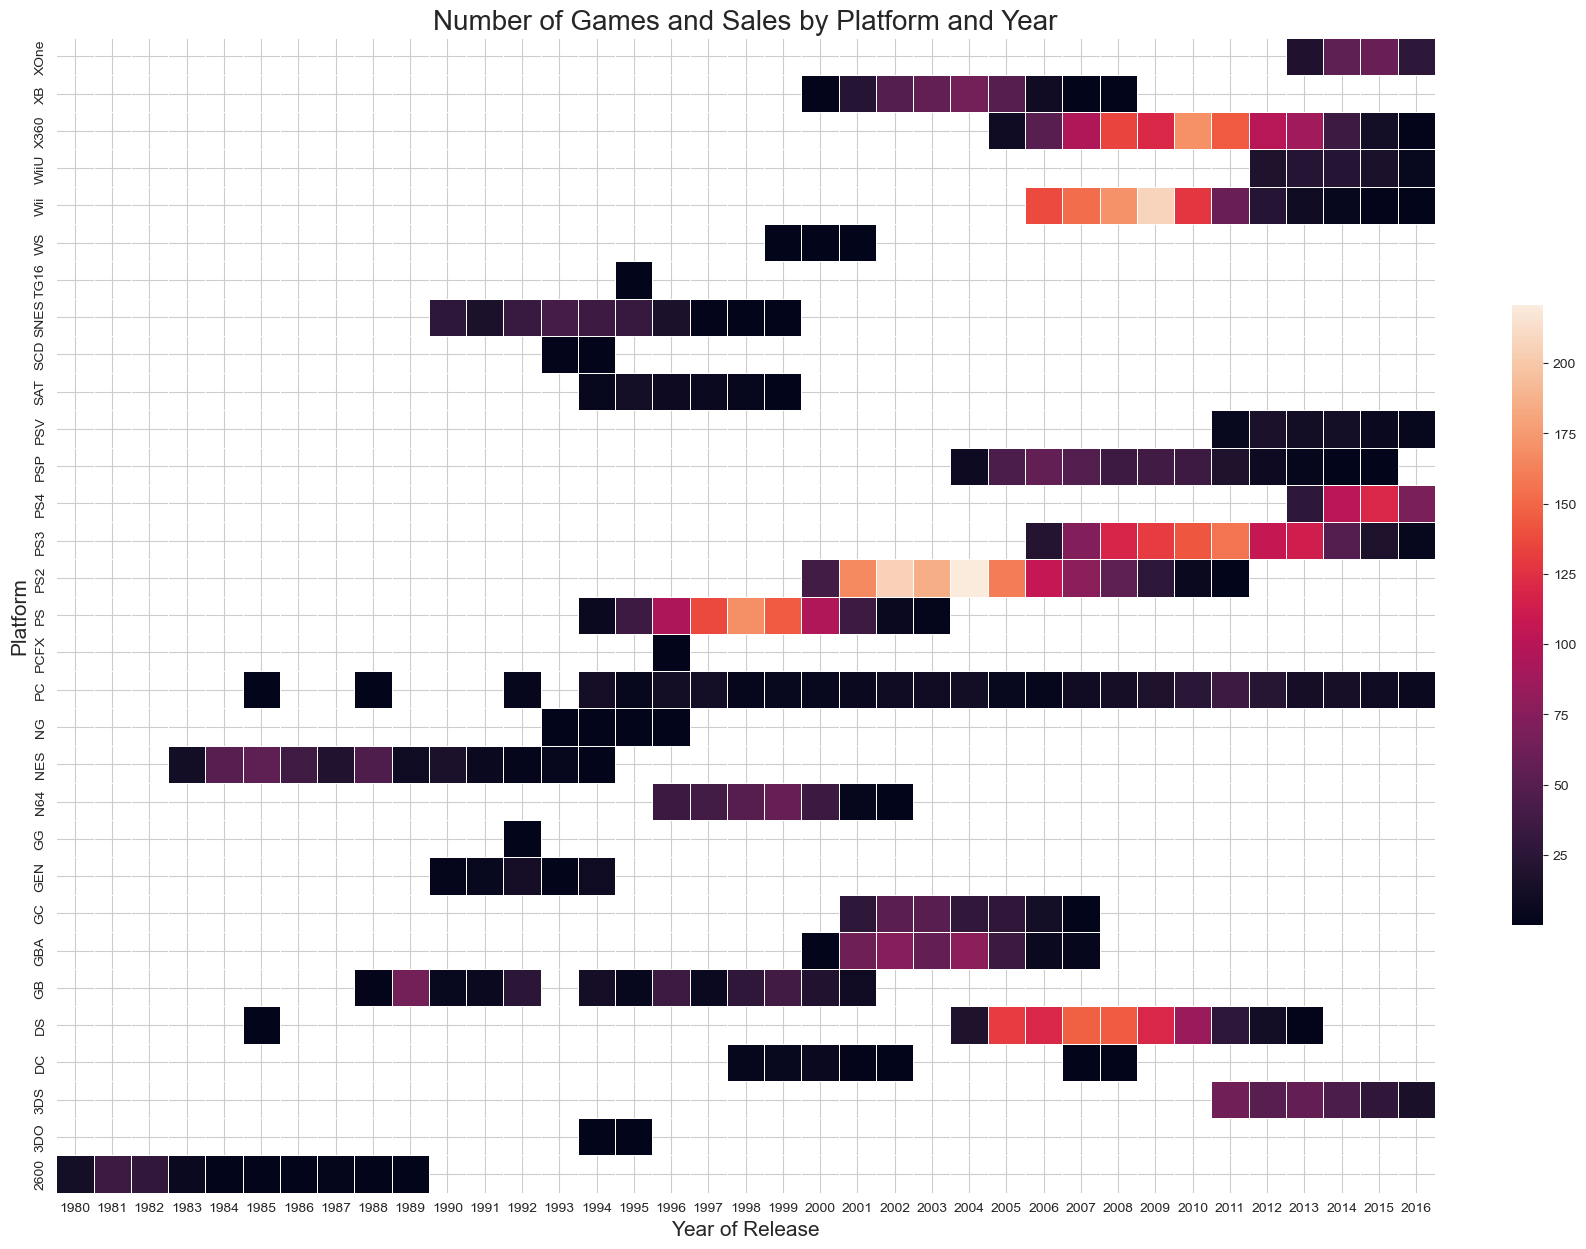

In [33]:
#platform_dist = df.pivot_table('name', 'platform', 'year_of_release', aggfunc='count').sort_index(ascending=False)
platform_dist = df.pivot_table('total_sales', 'platform', 'year_of_release', aggfunc='sum').sort_index(ascending=False)
plt.figure(figsize=(20, 15))
sns.heatmap(
    platform_dist,
    square=True,
    cbar_kws={'fraction': 0.02},
    linewidth=0.5,
)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('Platform', fontsize=15)
plt.title('Number of Games and Sales by Platform and Year', fontsize=20)

##### Emerging Platforms with Sales and Relevant Consoles for 2017:


As we can observe in the above heat map, the platforms that experienced an increase in sales are the Xbox One and PS4. On the other hand, we can see that platforms like the PS3 and Xbox 360 started to decrease their sales. This can be attributed to developers focusing on releasing titles exclusively for the new generation consoles, such as the PS4 and Xbox One. These consoles, along with the timeless PC platform, will have relevant sales in 2017.

##### Popularity of platforms and their relevance over the years

<div style="text-align: justify;">

</div>

In [34]:
def group_and_extract(df, platform, name, year_of_release):
    df_copy = df.copy()
    df_copy[year_of_release] = pd.to_datetime(df_copy[year_of_release], format='%Y')
    grouped = df_copy.groupby(platform)
    result = grouped[[name, year_of_release]].agg([pd.Series.idxmin, pd.Series.idxmax])
    result.columns = ['first_title', 'last_title']
    result['first_date'] = result['first_title'].apply(lambda x: df_copy.loc[x, year_of_release])
    result['last_date'] = result['last_title'].apply(lambda x: df_copy.loc[x, year_of_release])
    result['first_year'] = result['first_date'].dt.year
    result['last_year'] = result['last_date'].dt.year
    return result[['first_year', 'last_year']]

console_age = group_and_extract(df, 'platform', 'name', 'year_of_release')

/var/folders/dm/z0dt70s14jj7d8y8905__g680000gn/T/ipykernel_4847/1860663113.py:5: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = grouped[[name, year_of_release]].agg([pd.Series.idxmin, pd.Series.idxmax])


In [35]:
console_age['platform_age'] = console_age['last_year'] - console_age['first_year']

In [36]:
console_age.sort_values(by='platform_age',ascending=True)

,first_year,last_year,platform_age
platform,,,
GG,1992,1992,0
PCFX,1996,1996,0
TG16,1995,1995,0
3DO,1994,1995,1
SCD,1993,1994,1
WS,1999,2001,2
NG,1993,1996,3
XOne,2013,2016,3
PS4,2013,2016,3


In [37]:
console_age['platform_age'].median()

6.0

##### Average lifespan of gaming consoles:

As we can observe, gaming platforms have an average lifespan of around 6 years in the market. Some of the longest-lived platforms include:

* PC
* DS
* GB
* PSP
* X360
* NES
* PS2
* DC

The longevity of certain consoles can be attributed to the longer refresh cycles that existed three decades ago. During that time, console manufacturers followed longer product lifecycles, allowing platforms like the SNES to remain relevant for a more extended period.

##### Top-selling consoles:

When considering the top-selling consoles, I focused on the consoles from the last two generations to date. This is because while some consoles may have high sales figures, they may no longer be relevant or actively sold. Additionally, some recently released consoles may not have had sufficient time on the market to accumulate high sales numbers.

* Xbox One
* Xbox 360
* Wii U
* Wii 
* 3DS
* PSV
* PSP
* PS4
* PS3
* PC


In [38]:
platform_list = ['XOne', 'PS4', 'WiiU', '3DS', 'PSV', 'PS3', 'Wii', 'X360', 'PC']
filtered_df = df.query("platform in @platform_list and year_of_release >= 2013")
filtered_df.reset_index(inplace=True, drop=True)
filtered_df = filtered_df.dropna(subset=['platform'])
filtered_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


##### Chosen data period for analysis:

Based on our previous observations, I have decided to use data from 2013 onwards. This period was chosen because it provides greater significance and allows us to analyze sales figures for both long-standing consoles and newly released consoles with emerging sales

#### Visualizing global game sales by platform

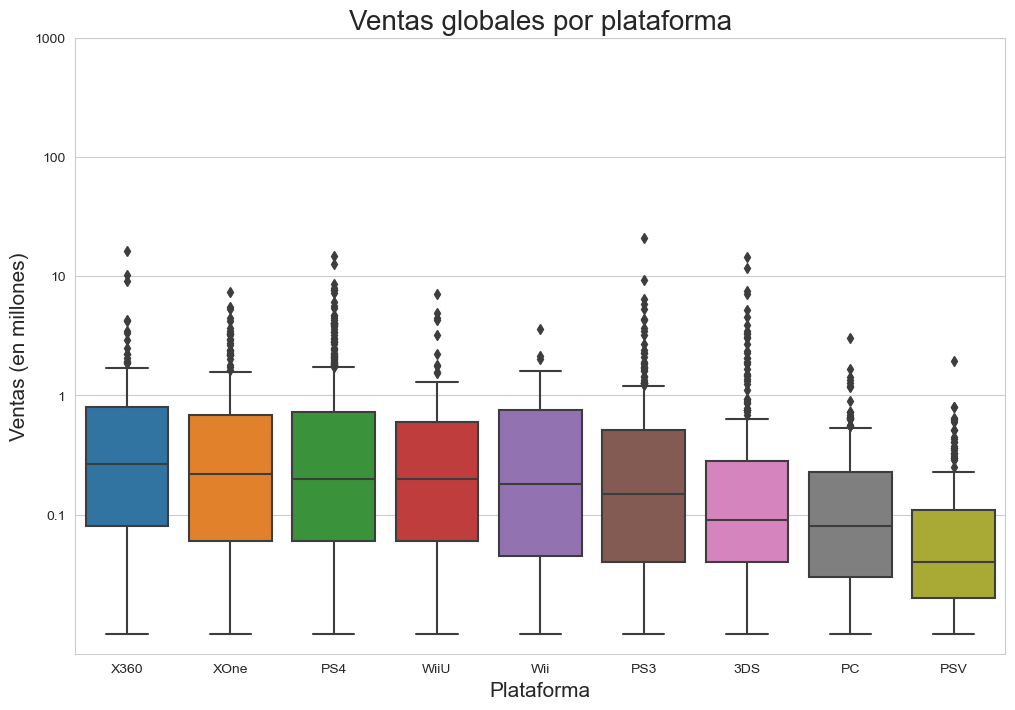

In [39]:

fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.set_style('whitegrid')
sns.boxplot(x='platform', y='total_sales', data=filtered_df, order=filtered_df.groupby('platform')['total_sales'].median().sort_values(ascending=False).index, ax=ax)
ax.set_title('Ventas globales por plataforma', fontsize=20)
ax.set_xlabel('Plataforma', fontsize=15)
ax.set_ylabel('Ventas (en millones)', fontsize=15)
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10, 100, 1000])
ax.set_yticklabels(['0.1', '1', '10', '100', '1000'])
plt.show()




We can observe that there is not a significant difference between consoles of different generations but from the same company. The distributions have a positive skew, indicating that the majority of games have low sales, while a few have extremely high sales. This is a common characteristic in the industry, with some games representing a significant portion of a console's sales.

Correlación entre las reseñas y las ventas para cada plataforma:

3DS: 0.36
PC: 0.20
PS3: 0.33
PS4: 0.41
PSV: 0.25
Wii: nan
WiiU: 0.38
X360: 0.35
XOne: 0.42


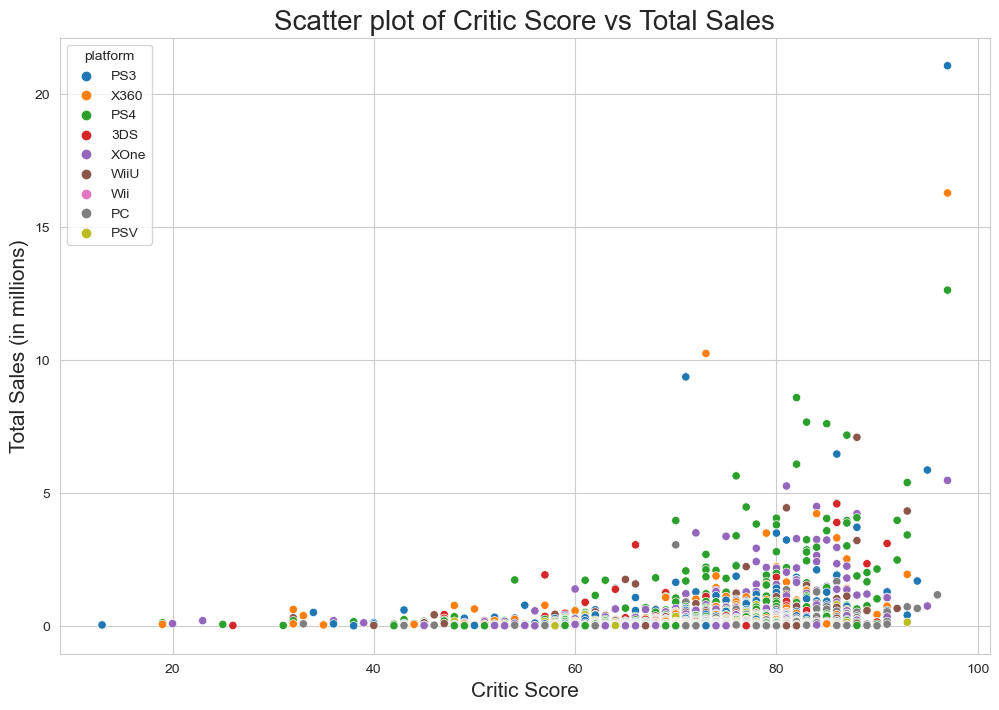

In [40]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_df, hue='platform', ax=ax)
ax.set_title('Scatter plot of Critic Score vs Total Sales', fontsize=20)
ax.set_xlabel('Critic Score', fontsize=15)
ax.set_ylabel('Total Sales (in millions)', fontsize=15)

# Calcula la correlación entre las reseñas y las ventas para cada plataforma
corr_df = filtered_df.groupby('platform')[['critic_score', 'total_sales']].corr().iloc[0::2,-1].reset_index()

# Muestra la correlación para cada plataforma
print('Correlación entre las reseñas y las ventas para cada plataforma:\n')
for platform in corr_df['platform'].unique():
    platform_corr = corr_df[corr_df['platform'] == platform]
    print(f"{platform}: {platform_corr['total_sales'].values[0]:.2f}")


The calculated correlations between critic review scores and total global sales by platform range from 0.16 to 0.41. We can say that there is a moderate positive relationship between specialized media reviews and overall sales for most platforms in the analyzed dataset.

The results suggest that game sales tend to increase as critic reviews become more favorable.

Correlación entre las reseñas del usuario y las ventas para cada plataforma:

3DS: 0.24
PC: -0.09
PS3: 0.00
PS4: -0.03
PSV: 0.00
Wii: 0.68
WiiU: 0.42
X360: -0.01
XOne: -0.07


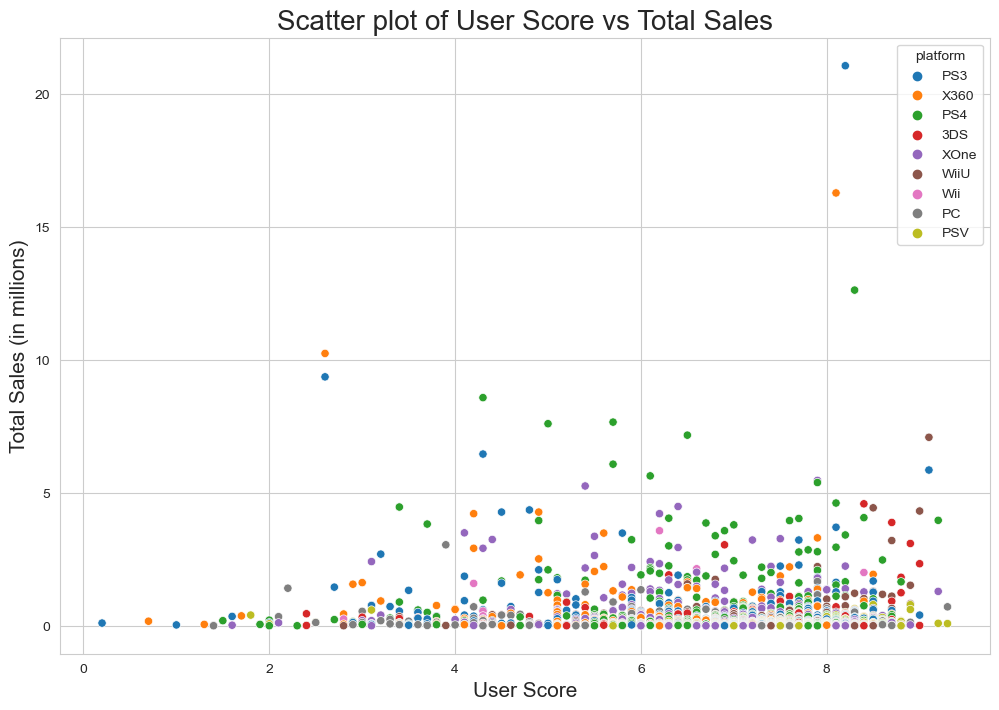

In [41]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.scatterplot(x='user_score', y='total_sales', data=filtered_df, hue='platform', ax=ax)
ax.set_title('Scatter plot of User Score vs Total Sales', fontsize=20)
ax.set_xlabel('User Score', fontsize=15)
ax.set_ylabel('Total Sales (in millions)', fontsize=15)

# Calcula la correlación entre las reseñas y las ventas para cada plataforma
corr_df = filtered_df.groupby('platform')[['user_score', 'total_sales']].corr().iloc[0::2,-1].reset_index()

# Muestra la correlación para cada plataforma
print('Correlación entre las reseñas del usuario y las ventas para cada plataforma:\n')
for platform in corr_df['platform'].unique():
    platform_corr = corr_df[corr_df['platform'] == platform]
    print(f"{platform}: {platform_corr['total_sales'].values[0]:.2f}")

Overall, we can say that there is a moderate relationship between user reviews and sales across platforms, but the strength of this relationship varies depending on the platform in question.

This suggests that, in general, the correlation between user reviews and sales is not very strong for most platforms. There are only a few platforms, such as the third in the list, that have a relatively high correlation (0.086266) between user reviews and sales. This might suggest that for some platforms, user reviews have a significant impact on sales, while for others not so much. Overall, a more detailed analysis would be needed to draw stronger conclusions.

##### Sales of popular video games on different platforms

In [42]:
# Seleccionando solo los juegos que aparecen en al menos dos plataformas

platform_list = ['PS3', 'PS4', 'XOne', 'X360', 'PC']
multi_platform_games = filtered_df[filtered_df['platform'].isin(platform_list)].groupby('name').filter(lambda x: x['platform'].nunique() >= 2)

# Agrupando por juego y plataforma de acuerdo a las ventas globales
grouped_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

#Creando nuestra tabla pivote
pivoted_sales = grouped_sales.pivot(index='name', columns='platform', values='total_sales')

top_10_games = pivoted_sales.sum(axis=1).sort_values(ascending=False).head(10)
a = pivoted_sales.loc[top_10_games.index]
display(pivoted_sales.loc[top_10_games.index])


platform,PC,PS3,PS4,X360,XOne
name,,,,,
Grand Theft Auto V,1.17,21.05,12.62,16.27,5.47
Call of Duty: Ghosts,0.69,9.36,3.83,10.24,2.92
Call of Duty: Black Ops 3,0.26,1.69,14.63,1.70,7.39
Call of Duty: Advanced Warfare,0.41,4.36,7.66,4.28,5.26
Minecraft,NaN,5.27,4.32,9.18,2.76
FIFA 16,0.20,2.70,8.58,1.57,3.25
FIFA 15,0.29,4.28,6.08,2.92,2.18
FIFA 14,0.40,6.46,3.01,4.22,1.16
Battlefield 4,1.36,3.49,3.58,3.49,2.02


<Figure size 2500x1000 with 0 Axes>

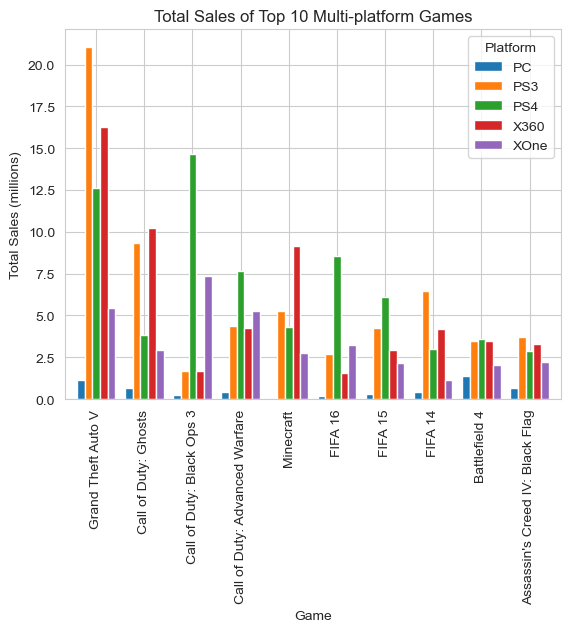

In [43]:


# Set the figure size
plt.figure(figsize=(25, 10))

# Define the colors for each platform
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']

# Create the grouped bar chart
a.plot(kind='bar', width=0.8, color=colors)

# Add labels and title
plt.xlabel('Game')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales of Top 10 Multi-platform Games')

# Add legend
plt.legend(title='Platform', loc='upper right', labels=a.columns.values)

# Display the chart
plt.show()


Looking at the table of game sales on different platforms, we can notice the following:

* The best-selling game on the list is Grand Theft Auto V, with highest sales on PS3 and PS4, followed by Call of Duty: Ghosts, with highest sales on PS3 and X360.
* Minecraft is another game that has sold well on all platforms listed, with highest sales on PS3.
* FIFA series games have also sold well, with sales highest on PS4 for FIFA 16 and FIFA 15, and on PS3 for FIFA 14.
* Battlefield 4 and Assassin's Creed IV: Black Flag are other games that have sold well on different platforms, with higher sales on PC and PS3, respectively.

Overall, we can conclude that the most popular and best-selling games on these platforms are those that have been released on multiple consoles.


##### Profitability by genre

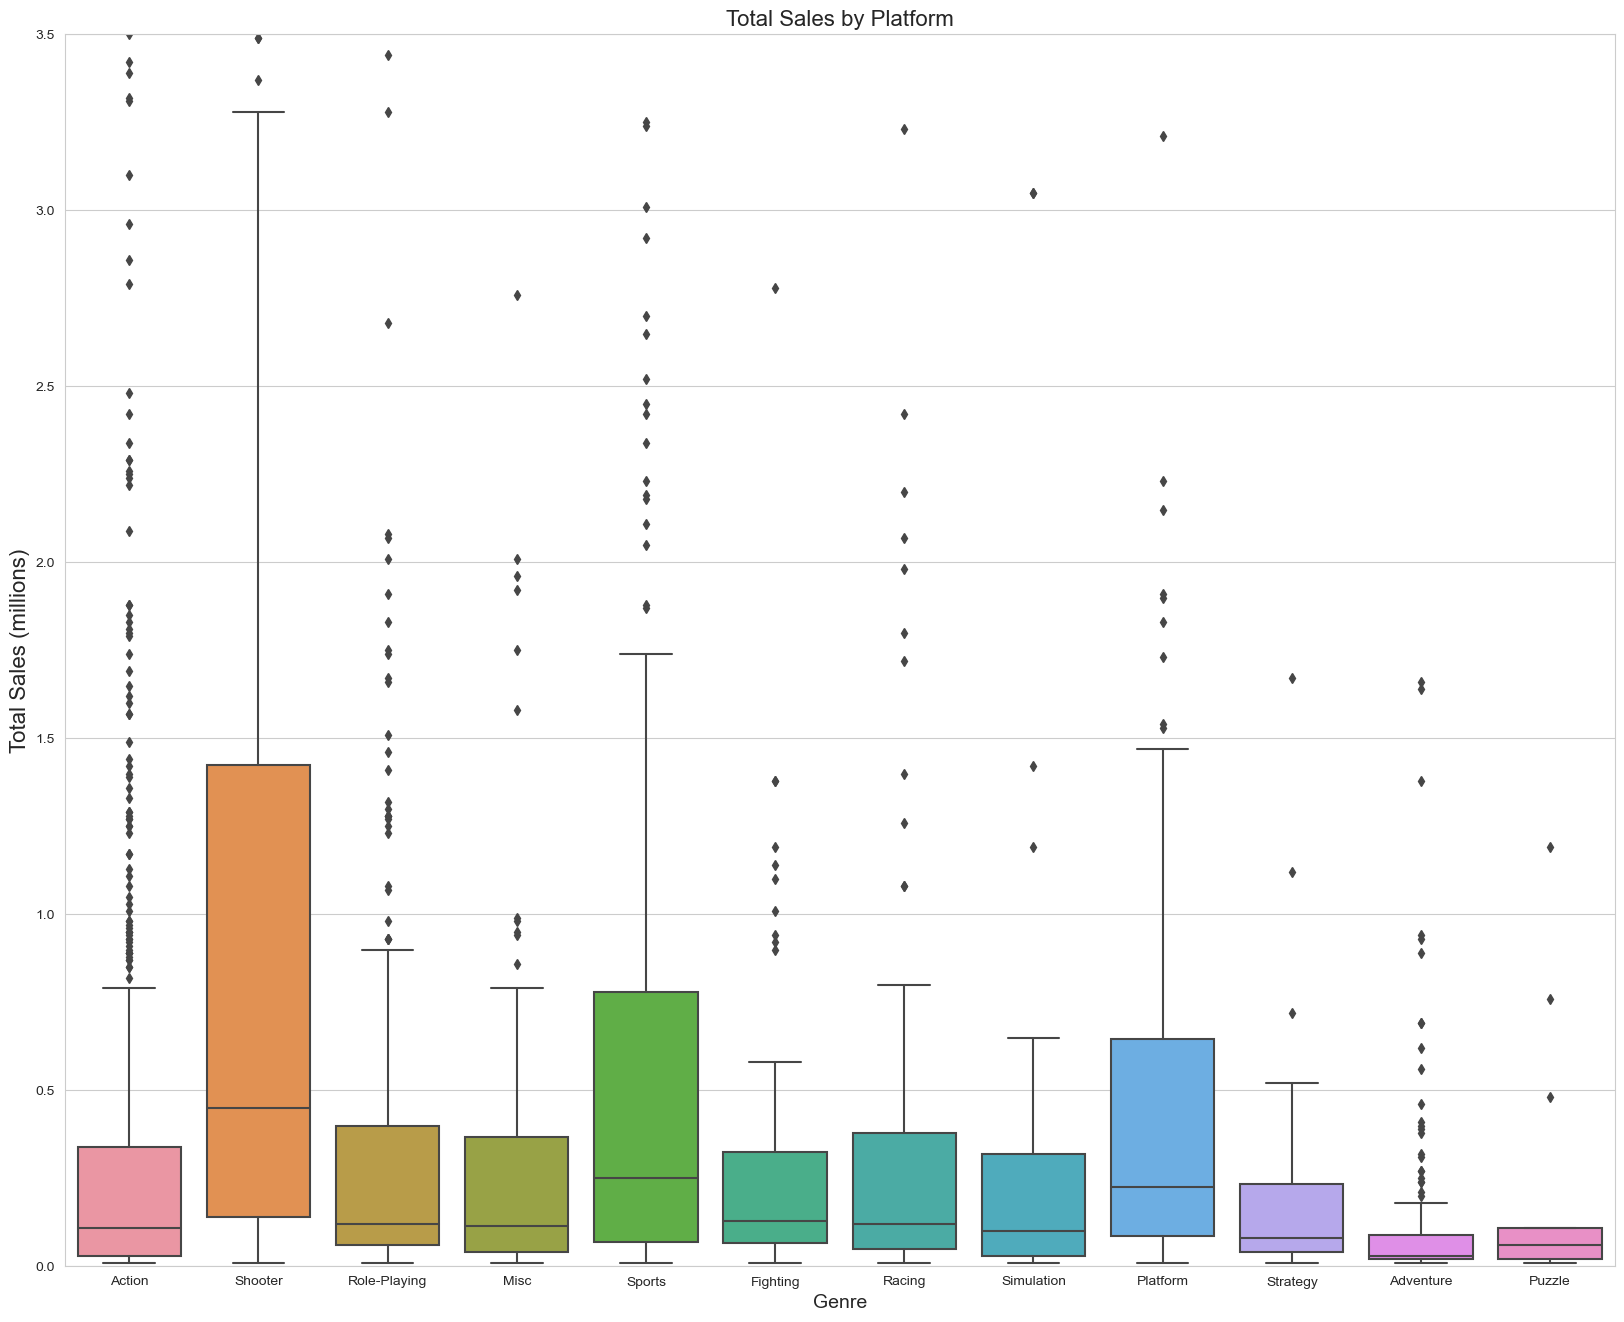

In [44]:
plt.figure(figsize=(20, 16))

box_plot = sns.boxplot(x='genre', y='total_sales', data=filtered_df)

box_plot.set_xlabel('Genre', fontsize=14)
box_plot.set_ylabel('Total Sales (millions)', fontsize=16)

plt.title('Total Sales by Platform', fontsize=16)
plt.ylim(0, 3.5)
plt.show()



In general, it can be observed that action, shooter and sports genres generate the most revenue across all platforms. In addition, it can be noted that adventure, strategy and simulation games tend to have lower revenues compared to other genres. It can also be noted that sales vary significantly within each genre, indicating that not all games within a genre are equally profitable.

#### User profile by region

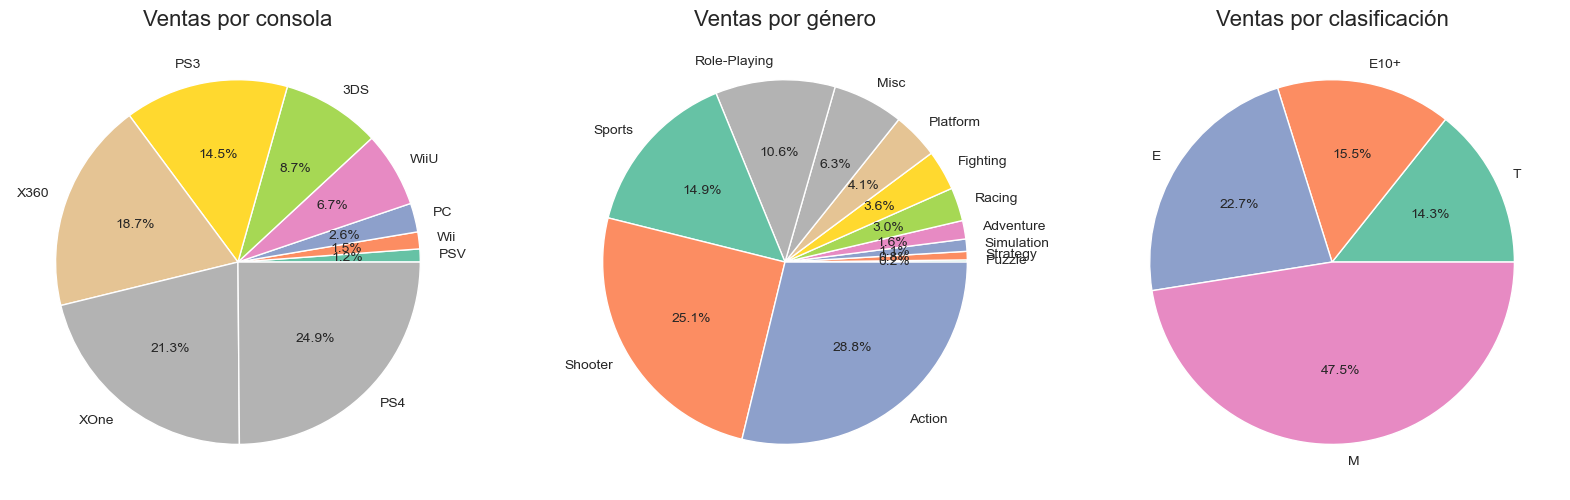

In [45]:
# Porcentaje de ventas por consola en Norte América
na_sales_by_platform = filtered_df.groupby('platform')['na_sales'].sum().sort_values()
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.pie(na_sales_by_platform, labels=na_sales_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(na_sales_by_platform.index))))
plt.title('Ventas por consola', fontsize=16)

# Porcentaje de ventas por género en Norte América
na_sales_by_genre = filtered_df.groupby('genre')['na_sales'].sum().sort_values()
plt.subplot(1, 3, 2)
plt.pie(na_sales_by_genre, labels=na_sales_by_genre.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(na_sales_by_platform.index))))
plt.title('Ventas por género', fontsize=16)

# Porcentaje de ventas por clasificación en Norte América
na_sales_by_rating = filtered_df.groupby('rating')['na_sales'].sum().sort_values()
plt.subplot(1, 3, 3)
plt.pie(na_sales_by_rating, labels=na_sales_by_rating.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(na_sales_by_platform.index))))
plt.title('Ventas por clasificación', fontsize=16)

plt.show()


The predominant consoles in North America are the Xbox 360, Ps3 and Wii, probably because at that time consoles like Xbox One and Ps4 were starting to emerge and gain weight in sales.

We can see that Americans prefer shooters and action games, followed by sports and their biggest sales are spread across E and M rated titles, which is consistent with the majority of shooters, action and sports games.

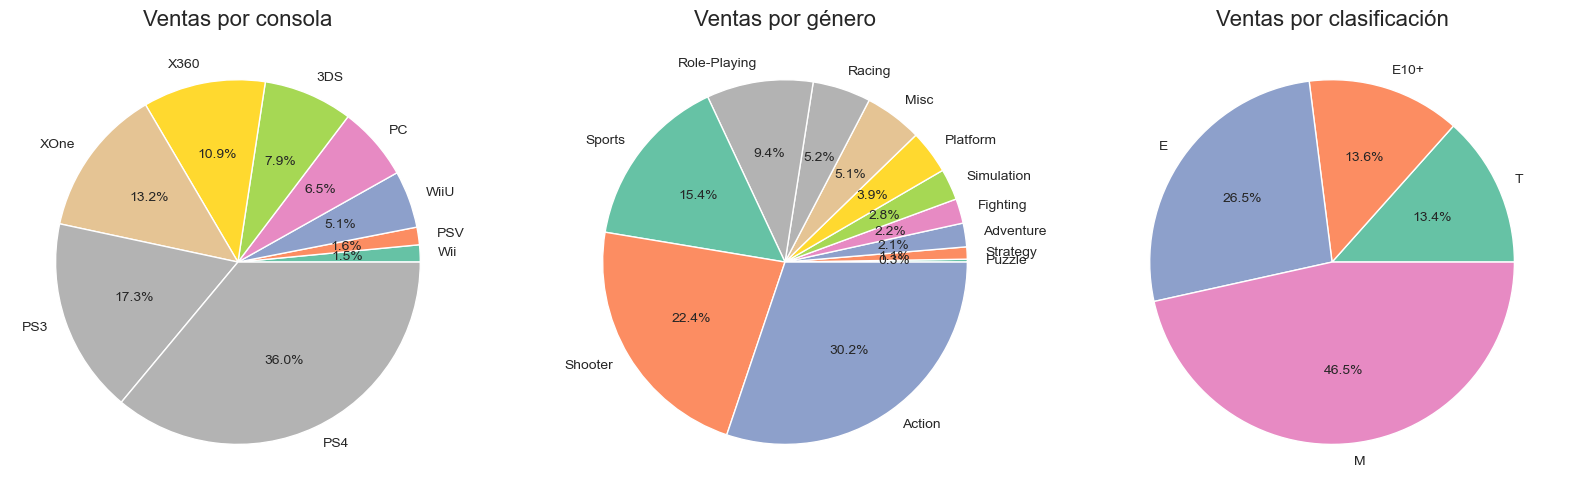

In [46]:
# Porcentaje de ventas por consola en Eureopa
eu_sales_by_platform = filtered_df.groupby('platform')['eu_sales'].sum().sort_values()
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.pie(eu_sales_by_platform, labels=eu_sales_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(eu_sales_by_platform.index))))
plt.title('Ventas por consola', fontsize=16)

# Porcentaje de ventas por género en Europa
eu_sales_by_genre = filtered_df.groupby('genre')['eu_sales'].sum().sort_values()
plt.subplot(1, 3, 2)
plt.pie(eu_sales_by_genre, labels=eu_sales_by_genre.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(eu_sales_by_platform.index))))
plt.title('Ventas por género', fontsize=16)

# Porcentaje de ventas por clasificación en Europa
eu_sales_by_rating = filtered_df.groupby('rating')['eu_sales'].sum().sort_values()
plt.subplot(1, 3, 3)
plt.pie(eu_sales_by_rating, labels=eu_sales_by_rating.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(eu_sales_by_platform.index))))
plt.title('Ventas por clasificación', fontsize=16)

plt.show()

In terms of consoles, Europe follows a very similar trend to North America, with consoles such as the Ps3 and X360 accounting for the largest sales of titles. 

Like Americans, Europeans prefer shooters, action and sports games as well as games with an E and M rating.

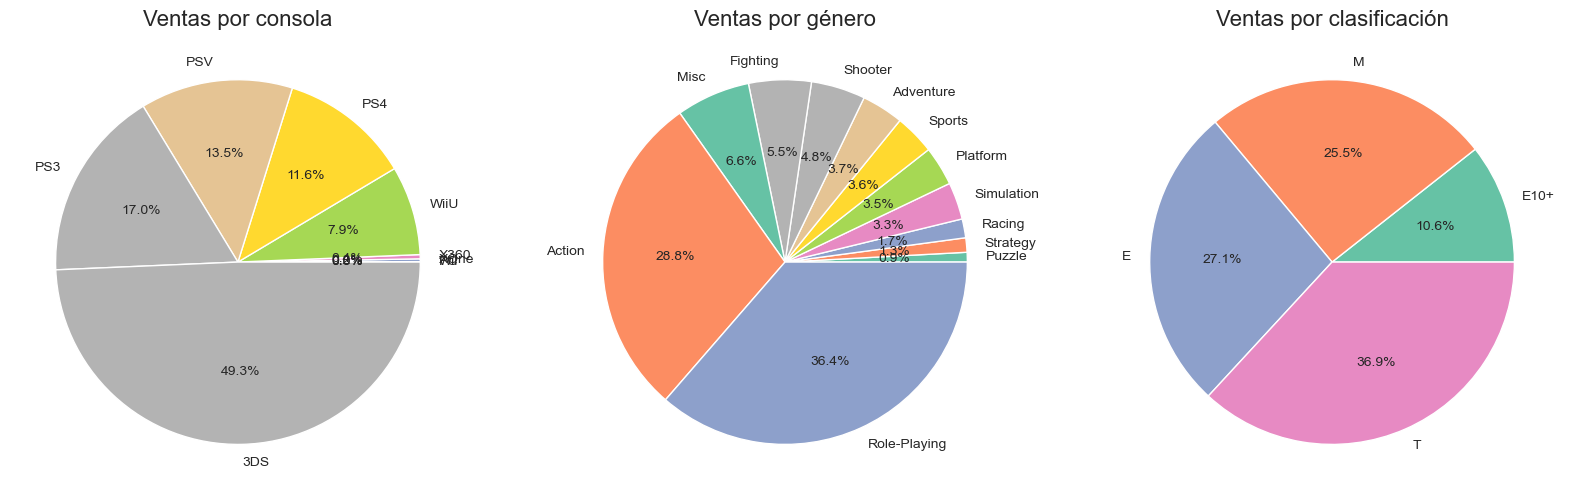

In [47]:
# Porcentaje de ventas por consola en Japón
jp_sales_by_platform = filtered_df.groupby('platform')['jp_sales'].sum().sort_values()
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.pie(jp_sales_by_platform, labels=jp_sales_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(jp_sales_by_platform.index))))
plt.title('Ventas por consola', fontsize=16)

# Porcentaje de ventas por género en Japón
jp_sales_by_genre = filtered_df.groupby('genre')['jp_sales'].sum().sort_values()
plt.subplot(1, 3, 2)
plt.pie(jp_sales_by_genre, labels=jp_sales_by_genre.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(jp_sales_by_platform.index))))
plt.title('Ventas por género', fontsize=16)

# Porcentaje de ventas por clasificación en Japón
jp_sales_by_rating = filtered_df.groupby('rating')['jp_sales'].sum().sort_values()
plt.subplot(1, 3, 3)
plt.pie(jp_sales_by_rating, labels=jp_sales_by_rating.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(jp_sales_by_platform.index))))
plt.title('Ventas por clasificación', fontsize=16)

plt.show()

Sales in Japan for consoles vary drastically, with Japanese consoles being the winners and leaving aside American consoles such as the X360 and the XOne.

Japanese prefer role-playing, action and sports games, as well as mostly E and T-rated games.

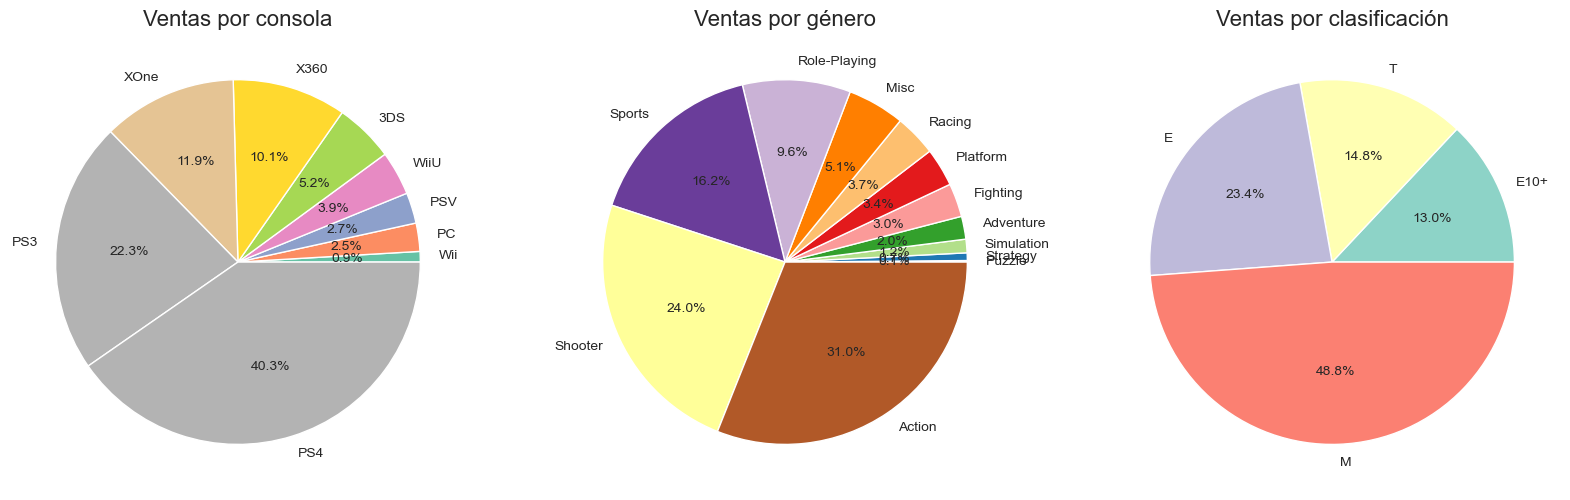

In [48]:
# Porcentaje de ventas por consola en el resto del mundo
other_sales_by_platform = filtered_df.groupby('platform')['other_sales'].sum().sort_values()
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.pie(other_sales_by_platform, labels=other_sales_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(other_sales_by_platform.index))))
plt.title('Ventas por consola', fontsize=16)

# Porcentaje de ventas por género en el resto del mundo
other_sales_by_genre = filtered_df.groupby('genre')['other_sales'].sum().sort_values()
plt.subplot(1, 3, 2)
plt.pie(other_sales_by_genre, labels=other_sales_by_genre.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(other_sales_by_genre.index))))
plt.title('Ventas por género', fontsize=16)

# Porcentaje de ventas por clasificación en el resto del mundo
other_sales_by_rating = filtered_df.groupby('rating')['other_sales'].sum().sort_values()
plt.subplot(1, 3, 3)
plt.pie(other_sales_by_rating, labels=other_sales_by_rating.index, autopct='%1.1f%%', colors=plt.cm.Set3(range(len(other_sales_by_rating.index))))
plt.title('Ventas por clasificación', fontsize=16)

plt.show()


* Sales in the rest of the world do not vary much with respect to North America and Europe, with X360, Ps3 and Wii consoles being preferred, with titles of the same genre such as Sports, Action and Shooters, with E and M rated games having the largest share.

* The preferences and tastes of gamers are influenced by their cultural and economic context, while in America and Europe action and shooting games are popular in Japan RPGs have a greater importance, likewise the preferences of gamers may be influenced by the availability of titles in each region and the marketing promoted in these regions.

* The E10+ rating criterion, which is suitable for all ages 10+, ranks last in terms of sales. Meanwhile, the E criterion, which is suitable for all ages, ranks first in the regions along with the M rating, for ages 17+, except in Japan where the T rating, suitable for ages 13+, ranks second in terms of best-selling games. Therefore, it cannot be said that games with less restrictive ratings, both in terms of age and content, have a significant impact on sales in the different regions.

### Testing Hypotheses
* Average user ratings for Xbox One and PC platforms are the same.


1. The null hypothesis(h0) is that the average user ratings for Xbox One and PC are equal.
2. The alternative hypothesis(h1) is that the average user ratings for Xbox One and PC are different.

In [49]:
#Primedio de los usuarios de Xbox One
display(filtered_df[filtered_df['platform']=='XOne']['user_score'].mean())

#Varianza de los usuarios de Xbox One
platform_xone = filtered_df[filtered_df['platform']=='XOne']['user_score']
platform_xone.var()

6.521428571428572

1.9069968429360702

In [50]:
#Primedio de los usuarios de PC
display(filtered_df[filtered_df['platform']=='PC']['user_score'].mean())

#Varianza de los usuarios de PC
platform_pc = filtered_df[filtered_df['platform']=='PC']['user_score']
platform_pc.var()

6.283974358974358

3.0481931348221667

In [51]:
#Prueba de Hipótesis Bilateral

alpha = 0.05 # nivel de significancia

results = st.ttest_ind(platform_xone.dropna(), platform_pc.dropna(), equal_var=False) 

print('Valor p: ', results.pvalue)


if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  0.17156613829336056
No podemos rechazar la hipótesis nula


A p-value of 0.1715 indicates that there is a 17.15% probability of obtaining a result as observed (or more extreme) if the null hypothesis were true, meaning that it is quite likely that the average user ratings for Xbox One and PC are the same. Therefore, we cannot reject the null hypothesis and conclude that there is not enough statistical evidence to show that there is a significant difference in average user ratings between Xbox One and PC.

* The average user ratings for the Action and Sports genres are different.

1. The null Hypothesis(h0): The average user ratings for the Action and Sports genres are equal.

2. Alternative Hypothesis(h1): The average user ratings for the Action and Sports genres are different.

In [52]:
#Primedio de los usuarios pera juegos de accion
display(filtered_df[filtered_df['genre']=='Action']['user_score'].mean())

#Varianza de de los usuarios pera juegos de accion
genre_action = filtered_df[filtered_df['genre']=='Action']['user_score']
genre_action.var()


6.847043701799486

1.7656935573635777

In [53]:
#Primedio de los usuarios pera juegos de Deportes
display(filtered_df[filtered_df['genre']=='Sports']['user_score'].mean())

#Varianza de de los usuarios pera juegos de Deportes
genre_sports = filtered_df[filtered_df['genre']=='Sports']['user_score']
genre_sports.var()

5.249685534591195

3.179224584029934

In [54]:
#Prueba de Hipótesis Bilateral

alpha = 0.05 # nivel de significancia

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False) 

print('Valor p: ', results.pvalue)


if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  1.9829262296274316e-20
Rechazamos la hipótesis nula


 The p-value obtained is very small (less than the standard significance level of 0.05), which means that it is highly unlikely that the results are due to chance. Therefore, we reject the null hypothesis and can conclude that the average user ratings for the Action and Sports genres are different.

### General Conclusion

This study described the DataFrame data and made corrections to the data type and duplicate elimination. The data was refined and a new variable, "all_sales," was created, which is the sum of sales in all regions.

Graph visualizations were performed for console and game sales, and it was found that action games are the top sellers in all regions except Japan, where RPGs are more popular. We also compared user ratings with reviewer ratings, and found that sales were most correlated with reviewer ratings.

For the first hypothesis, not being able to reject the null hypothesis, we can conclude that there is not enough statistical evidence to claim that the average user ratings for the Xbox One and PC platforms are different.

As for the second hypothesis, by rejecting the null hypothesis, we can conclude that there is sufficient statistical evidence to claim that the average user ratings for the Action and Sports genres are different. It is important to note that this does not necessarily imply that one genre is better or worse than the other, but simply that there is a significant difference in the average user ratings for both genres.